In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [69]:
#MOdificamos algunos parametros de plt
plt.rcParams['figure.figsize'] = (10,10) # 20 pulgadas de ancho y 20 de alto para todos los plots( modificamos el tamaño de las graficas

### Objetivo:
        # Análisis de columnas place_name	place_with_parent_names	state_name y definir los niveles  de ubicación geográfica para nuestro modelo

In [145]:
#Importamos el dataSet
df_properati = pd.read_csv('../Data/properati_1.csv')
df_properati.head()

In [1]:
#Extraemos las columnas :'place_with_parent_names', 'place_name','state_name' y analizamos 
df_ciudad = df_properati.loc[:,['place_with_parent_names','state_name','place_name']]
df_ciudad.head()

In [28]:
#Anlizamos valores nulos de cada columna:
def valores_nulos(df):
    for columna in df:
        print('{}--->{}'.format(columna, df[columna].isna().sum()))

In [2]:
valores_nulos(df_ciudad)

In [5]:
#Dividismo el campo df_ciudad para comparar con las columnas state_name y place_name
df_div = df_ciudad['place_with_parent_names'].apply(lambda x: pd.Series(x.split('|')))
df_div.head()

In [6]:
#Concatenamos df_ciudad con df_div
df_ciudad_2 = pd.concat([df_ciudad, df_div], axis = 1)
df_ciudad_2.head()

In [7]:
#anlizamos valores nuños para las columnas 2,3,4,5,6
valores_nulos(df_ciudad_2.loc[:,[2,3,4,5,6]])

In [35]:
#Observamos que la columna 5,6 tienen un gran porcentaje de valores nulos, decidimos eliminarlo.
df_ciudad_2 = df_ciudad_2.drop([0,1,5,6], axis = 1)

In [44]:
#comparamos valores 'state_name' 'place_name' con los calores que resultaron de dividir place_with_parent_names
def columnas_diferentes(df, columnas):
    
    print("Se tienen {} valores distintos entre {} y {}".format(df[df[columnas[0]]!=df[columnas[1]]].shape[0], columnas[0], columnas[1]))
    

In [45]:
df_ciudad_2[df_ciudad_2['state_name']!=df_ciudad_2[2]].shape[0]

0

In [47]:
columnas_diferentes(df_ciudad_2, ['state_name',2])
columnas_diferentes(df_ciudad_2, ['state_name',3])

Se tienen 0 valores distintos entre state_name y 2
Se tienen 35193 valores distintos entre place_name y 3


In [56]:
#inspeccionamos valores nulos de la columna 3 
df_ciudad_2[3].isna().sum()
# Observamos que  el campo place_name tenia 23 valores nulos

0

In [111]:
df_ciudad_2 = df_ciudad_2.loc[:,[2,3,4]]

In [113]:
#OJO:Aqui tenemos que eliminar las columnas 'state_name' ,'place_name' y 'whit_name_...' y concatenar df_ciudad2


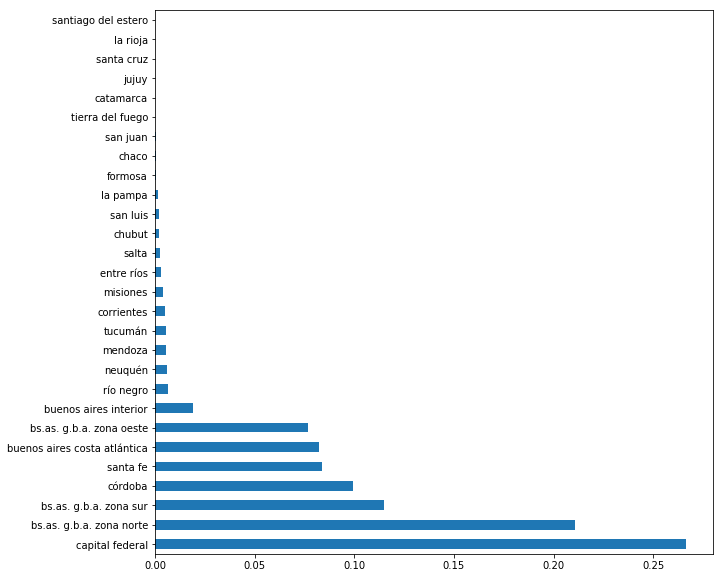

In [70]:
#Veamos una grafica de que Provincia tiene mayor publicaciones
df_ciudad_2[2].value_counts(normalize=True).plot.barh()

## CONCLUSION:
##### Eliminamos las columas 'state_name', 'place_name' del DataSet
##### COnservamos la columna 'place_with_parent_names', y trabajamos con el nivel de ubicacion que el nos proporciona:
        |- Pais
            |- Provincia
                |-Partidos-Departamentos
                    |-Municipio

## Objetivo:
   ##### - Comparar valores de las columnas lat, lon, y 'lat-lon' (valores nulos, igualdad)

In [87]:
# TOmamos  en un data frame las columnas en estudio
df_lat_lon = df_properati.loc[:,['lat-lon','lat','lon']]
df_lat_lon.head()

,lat-lon,lat,lon
0,"-34.6618237,-58.5088387",-34.661824,-58.508839
1,"-34.9038831,-57.9643295",-34.903883,-57.964330
2,"-34.6522615,-58.5229825",-34.652262,-58.522982
3,"-34.6477969,-58.5164244",-34.647797,-58.516424
4,"-38.0026256,-57.5494468",-38.002626,-57.549447


In [75]:
#Analizamos valores nulos en cada columna:
valores_nulos(df_lat_lon)

lat-lon--->51550
lat--->51550
lon--->51550


In [86]:
#Dividismo valores lat-lon para poder comparar independientemente con lat y lon
df_lat_lon['lat_lon']= df_lat_lon['lat-lon'].astype(str)
df_div_lat_lon = df_lat_lon['lat_lon'].apply(lambda x:pd.Series(x.split(',')))
df_div_lat_lon.head()

,0,1
0,-34.6618237,-58.5088387
1,-34.9038831,-57.9643295
2,-34.6522615,-58.5229825
3,-34.6477969,-58.5164244
4,-38.0026256,-57.5494468


In [ ]:
#Concatenamos
df_coord= pd.concat([df_lat_lon,df_div_lat_lon], axis = 1)


In [93]:
# convertimos en float el data frame y lo redondeamos a 4 decimas
df_coord = df_coord.drop(['lat-lon'], axis = 1)

In [106]:
df_coord= df_coord.astype(float)
df_coord = df_coord.round(4)
#Observamos algunos descriptivos:
df_coord.describe()

,lat,lon,0,1
count,44662.000000,44662.000000,44662.000000,44662.000000
mean,-34.583139,-59.376805,-34.583139,-59.376805
std,2.093952,2.450862,2.093952,2.450862
min,-54.824000,-75.678900,-54.824000,-75.678900
25%,-34.707500,-58.789800,-34.707500,-58.789800
50%,-34.602000,-58.490900,-34.602000,-58.490900
75%,-34.451725,-58.394700,-34.451725,-58.394700
max,4.545800,-53.733300,4.545800,-53.733300


#### Podemos Observar que lat y 0 poseen los mismo valores, que lon y 1 poseen los mismo valores
##### Inspeccionamos 

In [95]:
df_coord= df_coord.astype(float)
df_coord = df_coord.round(4)
#Eliminamos valores duplicados:
df_coord = df_coord.drop_duplicates()

In [97]:
#valores nulso en este nuevo dataFrame:
valores_nulos(df_coord)

lat--->1
lon--->1
0--->1
1--->1


In [101]:
#OBSERVAMOS QUE LOS VALORES DISTINTOS:
df_coord[df_coord['lat'] != df_coord[0]]

,lat,lon,0,1
13,NaN,NaN,NaN,NaN


# Conclusión
#### Observamos que la columna 'lon-lat' tienes los mismo valores que 'lon' y 'lat'
#### Nos quedamos con las columnas 'lon', 'lat' para consultar  ubicacion en: https://datosgobar.github.io/georef-ar-api/
#### Eliminamos la columna 'lat-lon'

In [107]:
#COmpletamos los valores restantes de ubicacion(Municipio)
import requests
import json
import time
from pandas.io.json import json_normalize

In [108]:
def consumir_api(row):
    try:
        url = 'https://apis.datos.gob.ar/georef/api/ubicacion?lat='+ str(row['lat']) + '&lon=' + str(row['lon'])
        response = (requests.get(url).text)
        response_json = json.loads(response)
        return response_json
    except Exception as e:
        raise e

In [140]:
#Concatenamos df_ciudad_2 con df_properati[lat, lon]
df_local_coor = pd.concat([df_ciudad_2,df_properati.loc[:,['lat', 'lon']]], axis = 1)

In [141]:
#SOlo nos interesa completar valores de la columna 4:
df_local_coor = df_local_coor[df_local_coor[4].isna() |(df_local_coor[4]=='')]

In [142]:
#liminamos df con lat, lon en nan
df_local_coor = df_local_coor[df_local_coor['lat'].notna() |(df_local_coor['lon'].notna())]

In [144]:
df_local_coor.shape[0]

50692

In [ ]:
# Consultamos en la api estos valores de dataframe
df_local_coor['api'] = df_local_coor.apply(consumir_api, axis = 1)
df_local_coor['api']

In [ ]:
#Normalizamos JSON en el DATAFRAME
df = json_normalize(df_local_coor['api'])